In [ ]:
!pip install tensorflow pandas numpy scikit-learn

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Load and Inspect the Data**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load dataset
df= pd.read_excel('/content/drive/MyDrive/BrajT0HinidiiiEnglish/Data.xlsx')


In [ ]:
df.head()

,Braj,Hindi,English
0,हमका कउनू मदद करब?,मुझे मदद करोगे?,Will you help me?
1,तू हमरा के कहां ले जाइब?,तुम मुझे कहाँ ले जाओगे?,Where are you going with me?
2,तू कहाँ रइहबा?,तुम कहाँ रह रहे हो?,Where are you living?
3,तू कहाँ मिलल बा?,तुम कहाँ मिल रहे हो?,Where are you meeting?
4,तोहरे भाई का का नाम बा?,तुम्हारे भाई का नाम क्या है?,What is your brother's name?


In [ ]:
df.tail()

,Braj,Hindi,English
995,तू का देख रहल हा?,तुम क्या देख रहे हो?,What are you watching?
996,तू का पढ़ रहल हा?,तुम क्या पढ़ रहे हो?,What are you reading?
997,तोहार दोस्त कहां बा?,तुम्हारा दोस्त कहाँ है?,Do you want to ask me something?
998,केहो आ रहल बा?,कोई आ रहा है?,Is anyone coming?
999,तोहरे बाबा केसे बा?,तुम्हारे दादा कैसे हैं?,How is your grandfather?


In [ ]:
df.shape

(1000, 3)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Braj     1000 non-null   object
 1   Hindi    1000 non-null   object
 2   English  1000 non-null   object
dtypes: object(3)
memory usage: 23.6+ KB


In [ ]:
df.describe()

,Braj,Hindi,English
count,1000,1000,1000
unique,172,142,126
top,तू हमरा के कहां ले जाइब?,तुम कहाँ जा रहे हो?,Where are you going?
freq,18,35,57


**Visualize Sentence Lengths**

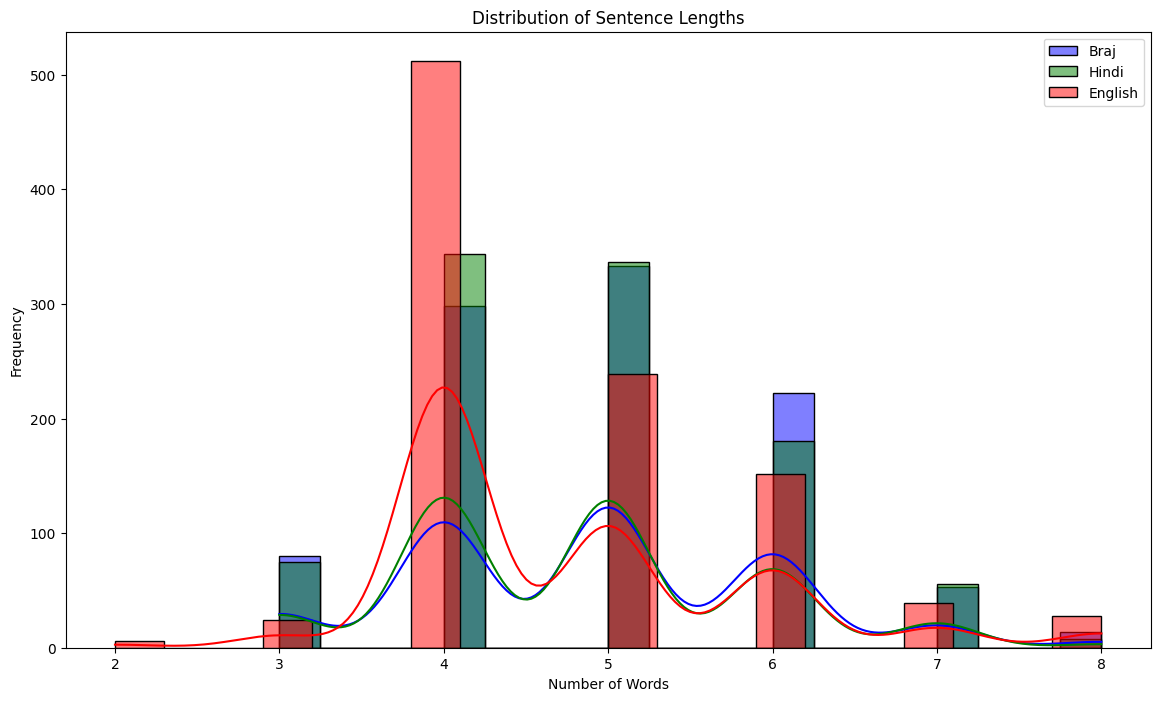

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate sentence lengths
df['Braj_Length'] = df['Braj'].apply(lambda x: len(str(x).split()))
df['Hindi_Length'] = df['Hindi'].apply(lambda x: len(str(x).split()))
df['English_Length'] = df['English'].apply(lambda x: len(str(x).split()))

# Plot sentence lengths
plt.figure(figsize=(14, 8))
sns.histplot(df['Braj_Length'], kde=True, color='blue', label='Braj', bins=20)
sns.histplot(df['Hindi_Length'], kde=True, color='green', label='Hindi', bins=20)
sns.histplot(df['English_Length'], kde=True, color='red', label='English', bins=20)
plt.title('Distribution of Sentence Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.legend()
plt.show()


 **Word Frequency Analysis**

Text(0.5, 1.0, 'Braj Word Cloud')

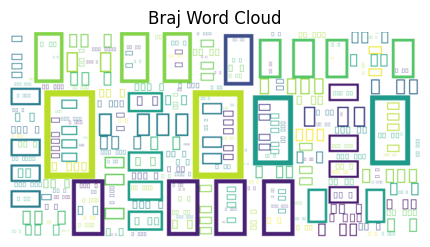

In [ ]:
from wordcloud import WordCloud

# Generate word clouds
braj_text = ' '.join(df['Braj'].dropna().tolist())
hindi_text = ' '.join(df['Hindi'].dropna().tolist())
english_text = ' '.join(df['English'].dropna().tolist())

# Plot the word clouds
plt.figure(figsize=(18, 8))
plt.subplot(1, 3, 1)
wordcloud_braj = WordCloud(width=800, height=400, background_color='white').generate(braj_text)
plt.imshow(wordcloud_braj, interpolation='bilinear')
plt.axis('off')
plt.title('Braj Word Cloud')

Text(0.5, 1.0, 'Hindi Word Cloud')

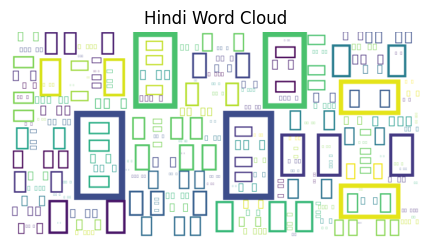

In [ ]:
plt.figure(figsize=(18, 8))
plt.subplot(1, 3, 2)
wordcloud_hindi = WordCloud(width=800, height=400, background_color='white').generate(hindi_text)
plt.imshow(wordcloud_hindi, interpolation='bilinear')
plt.axis('off')
plt.title('Hindi Word Cloud')

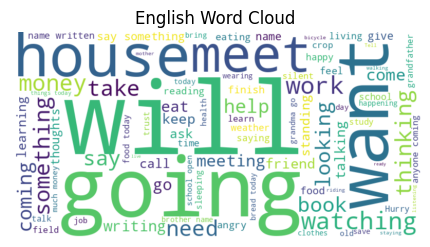

In [ ]:
plt.figure(figsize=(18, 8))
plt.subplot(1, 3, 3)
wordcloud_english = WordCloud(width=800, height=400, background_color='white').generate(english_text)
plt.imshow(wordcloud_english, interpolation='bilinear')
plt.axis('off')
plt.title('English Word Cloud')

plt.show()


**Correlation Between Sentence Lengths**

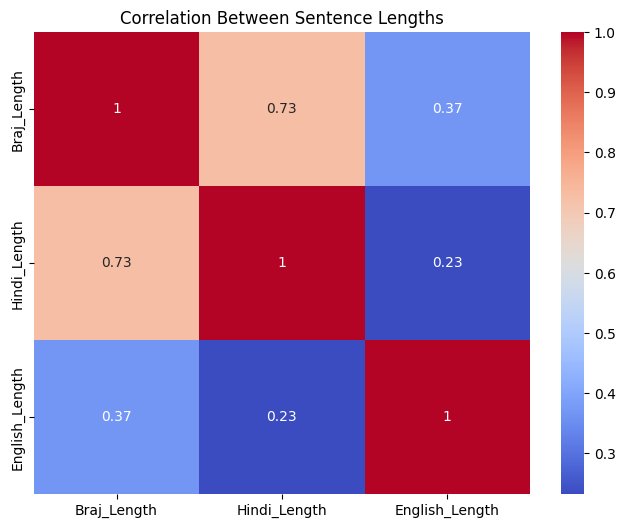

In [ ]:
# Plot correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Braj_Length', 'Hindi_Length', 'English_Length']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Sentence Lengths')
plt.show()


**Language Specific Analysis**

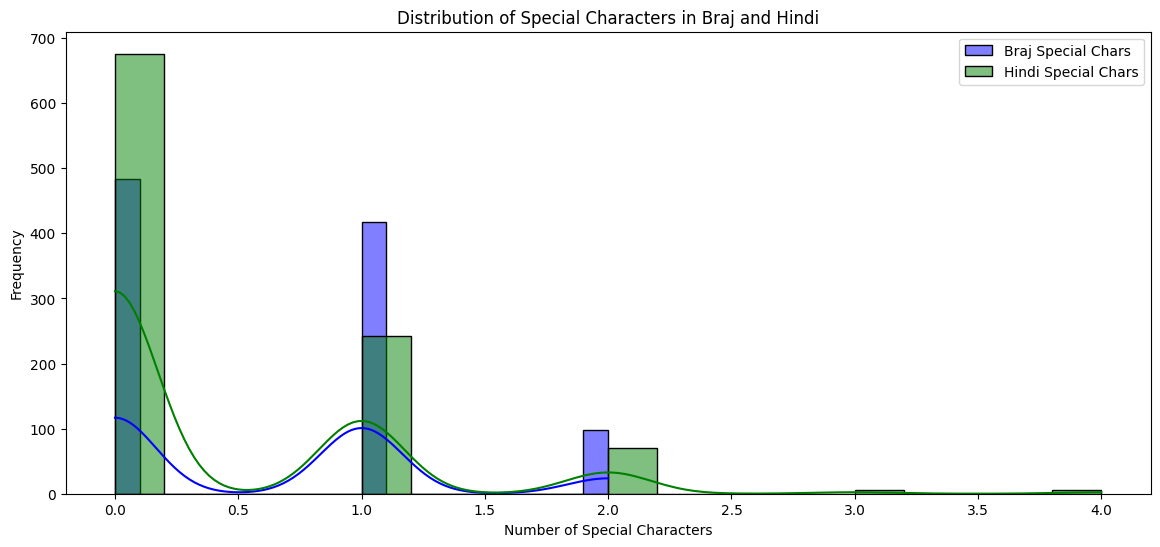

In [ ]:
# Count occurrences of specific characters in Braj and Hindi
df['Braj_Chars'] = df['Braj'].apply(lambda x: len([char for char in str(x) if char in 'अआइईउऊएऐओऔंः']) if pd.notnull(x) else 0)
df['Hindi_Chars'] = df['Hindi'].apply(lambda x: len([char for char in str(x) if char in 'अआइईउऊएऐओऔंः']) if pd.notnull(x) else 0)

# Plot distribution of these characters
plt.figure(figsize=(14, 6))
sns.histplot(df['Braj_Chars'], kde=True, color='blue', label='Braj Special Chars', bins=20)
sns.histplot(df['Hindi_Chars'], kde=True, color='green', label='Hindi Special Chars', bins=20)
plt.title('Distribution of Special Characters in Braj and Hindi')
plt.xlabel('Number of Special Characters')
plt.ylabel('Frequency')
plt.legend()
plt.show()


 **Handling Missing Values**

In [ ]:
# Check for missing values
print(df.isnull().sum())

# Drop rows with missing values (if any)
df = df.dropna()



Braj              0
Hindi             0
English           0
Braj_Length       0
Hindi_Length      0
English_Length    0
Braj_Chars        0
Hindi_Chars       0
dtype: int64


**Text Normalization**

Normalize the text data by converting it to lowercase and removing any unnecessary punctuation or special characters.

In [ ]:
import re

# Function to clean text
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text

# Apply text cleaning
df['Braj'] = df['Braj'].apply(clean_text)
df['Hindi'] = df['Hindi'].apply(clean_text)
df['English'] = df['English'].apply(clean_text)


 **Tokenization**

Tokenize the text into words, which is useful for many natural language processing tasks.

In [ ]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

# Function to tokenize text
def tokenize_text(text):
    return word_tokenize(text)

# Apply tokenization
df['Braj_Tokens'] = df['Braj'].apply(tokenize_text)
df['Hindi_Tokens'] = df['Hindi'].apply(tokenize_text)
df['English_Tokens'] = df['English'].apply(tokenize_text)

# Display the tokenized text
print(df[['Braj_Tokens', 'Hindi_Tokens', 'English_Tokens']].head())


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


               Braj_Tokens              Hindi_Tokens  \
0     [हमक, कउन, मदद, करब]            [मझ, मदद, करग]   
1  [त, हमर, क, कह, ल, जइब]      [तम, मझ, कह, ल, जओग]   
2            [त, कह, रइहब]       [तम, कह, रह, रह, ह]   
3          [त, कह, मलल, ब]       [तम, कह, मल, रह, ह]   
4   [तहर, भई, क, क, नम, ब]  [तमहर, भई, क, नम, कय, ह]   

                       English_Tokens  
0               [will, you, help, me]  
1  [where, are, you, going, with, me]  
2           [where, are, you, living]  
3          [where, are, you, meeting]  
4    [what, is, your, brothers, name]  


**Removing Stop Words**

Remove common stop words that do not contribute much to the meaning of the sentences.

In [ ]:
# from nltk.corpus import stopwords
# nltk.download('stopwords') # Download stopwords

# # Define stop words for each language
# stop_words_hindi = set(stopwords.words('hindi'))
# stop_words_english = set(stopwords.words('english'))
# stop_words_braj = set()  # Add your Braj stop words her e if available

# # Function to remove stop words
# def remove_stopwords(tokens, stop_words):
#     return [word for word in tokens if word not in stop_words]

# # Apply stop words removal
# df['Braj_Tokens'] = df['Braj_Tokens'].apply(lambda x: remove_stopwords(x, stop_words_braj))
# df['Hindi_Tokens'] = df['Hindi_Tokens'].apply(lambda x: remove_stopwords(x, stop_words_hindi))
# df['English_Tokens'] = df['English_Tokens'].apply(lambda x: remove_stopwords(x, stop_words_english))

# # Display the tokens after stop words removal
# print(df[['Braj_Tokens', 'Hindi_Tokens', 'English_Tokens']].head())

**Lemmatization**

Lemmatize the tokens to reduce them to their base or root form.



In [ ]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()

# Function to lemmatize tokens
def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(token) for token in tokens]

# Apply lemmatization
df['Braj_Tokens'] = df['Braj_Tokens'].apply(lemmatize_tokens)
df['Hindi_Tokens'] = df['Hindi_Tokens'].apply(lemmatize_tokens)
df['English_Tokens'] = df['English_Tokens'].apply(lemmatize_tokens)

# Display the lemmatized tokens
print(df[['Braj_Tokens', 'Hindi_Tokens', 'English_Tokens']].head())


               Braj_Tokens              Hindi_Tokens  \
0     [हमक, कउन, मदद, करब]            [मझ, मदद, करग]   
1  [त, हमर, क, कह, ल, जइब]      [तम, मझ, कह, ल, जओग]   
2            [त, कह, रइहब]       [तम, कह, रह, रह, ह]   
3          [त, कह, मलल, ब]       [तम, कह, मल, रह, ह]   
4   [तहर, भई, क, क, नम, ब]  [तमहर, भई, क, नम, कय, ह]   

                       English_Tokens  
0               [will, you, help, me]  
1  [where, are, you, going, with, me]  
2           [where, are, you, living]  
3          [where, are, you, meeting]  
4     [what, is, your, brother, name]  


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
# Convert token lists back to strings for saving
df['Braj_Processed'] = df['Braj_Tokens'].apply(lambda x: ' '.join(x))
df['Hindi_Processed'] = df['Hindi_Tokens'].apply(lambda x: ' '.join(x))
df['English_Processed'] = df['English_Tokens'].apply(lambda x: ' '.join(x))


**Splitting the Data**

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming 'Braj_Processed', 'Hindi_Processed', and 'English_Processed' are your columns
X = df['Braj_Processed']  # Input language (Braj)
y_hindi = df['Hindi_Processed']  # Target language (Hindi)
y_english = df['English_Processed']  # Target language (English)

# Split into training and testing sets for Hindi and English translations
X_train_hindi, X_test_hindi, y_train_hindi, y_test_hindi = train_test_split(X, y_hindi, test_size=0.2, random_state=42)
X_train_english, X_test_english, y_train_english, y_test_english = train_test_split(X, y_english, test_size=0.2, random_state=42)


**Tokenization and Padding**

In [ ]:
!pip install tensorflow
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenize Braj text
tokenizer_braj = Tokenizer()
tokenizer_braj.fit_on_texts(X_train_hindi)
X_train_hindi_seq = tokenizer_braj.texts_to_sequences(X_train_hindi)
X_test_hindi_seq = tokenizer_braj.texts_to_sequences(X_test_hindi)

# Tokenize Hindi text
tokenizer_hindi = Tokenizer()
tokenizer_hindi.fit_on_texts(y_train_hindi)
y_train_hindi_seq = tokenizer_hindi.texts_to_sequences(y_train_hindi)
y_test_hindi_seq = tokenizer_hindi.texts_to_sequences(y_test_hindi)

# Tokenize English text
tokenizer_english = Tokenizer()
tokenizer_english.fit_on_texts(y_train_english)
y_train_english_seq = tokenizer_english.texts_to_sequences(y_train_english)
y_test_english_seq = tokenizer_english.texts_to_sequences(y_test_english)

# Padding sequences
max_seq_len = max([len(seq) for seq in X_train_hindi_seq])
X_train_hindi_seq = pad_sequences(X_train_hindi_seq, maxlen=max_seq_len, padding='post')
X_test_hindi_seq = pad_sequences(X_test_hindi_seq, maxlen=max_seq_len, padding='post')

y_train_hindi_seq = pad_sequences(y_train_hindi_seq, maxlen=max_seq_len, padding='post')
y_test_hindi_seq = pad_sequences(y_test_hindi_seq, maxlen=max_seq_len, padding='post')

y_train_english_seq = pad_sequences(y_train_english_seq, maxlen=max_seq_len, padding='post')
y_test_english_seq = pad_sequences(y_test_english_seq, maxlen=max_seq_len, padding='post')


**Building the Translation Models**

Seq2Seq Model with LSTM for Hindi Translation

In [ ]:
from keras.models import Model
from keras.layers import Input, LSTM, Dense, Embedding

# Define the model architecture
latent_dim = 256  # Latent dimensionality of the encoding space

# Encoder
encoder_inputs = Input(shape=(None,))
encoder_embedding = Embedding(input_dim=len(tokenizer_braj.word_index)+1, output_dim=latent_dim)(encoder_inputs)
encoder_lstm = LSTM(latent_dim, return_state=True)
_, state_h, state_c = encoder_lstm(encoder_embedding)
encoder_states = [state_h, state_c]

# Decoder for Hindi translation
decoder_inputs = Input(shape=(None,))
decoder_embedding = Embedding(input_dim=len(tokenizer_hindi.word_index)+1, output_dim=latent_dim)(decoder_inputs)
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_embedding, initial_state=encoder_states)
decoder_dense = Dense(len(tokenizer_hindi.word_index)+1, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

# Define the model that will turn encoder_input_data & decoder_input_data into decoder_target_data
model_hindi = Model([encoder_inputs, decoder_inputs], decoder_outputs)

# Compile the model
model_hindi.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model_hindi.summary()


Model: "functional_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_14            │ (None, None)           │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_15            │ (None, None)           │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_6 (Embedding)   │ (None, None, 256)      │         36,864 │ input_layer_14[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_7 (Embedding)   │ (None, None, 256)      │         30,208 │ input_layer_15[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_6 (LSTM)             │ [(None, 256), (None,   │        525,312 │ embedding_6[0][0]      │
│                           │ 256), (None, 256)]     │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_7 (LSTM)             │ [(None, None, 256),    │        525,312 │ embedding_7[0][0],     │
│                           │ (None, 256), (None,    │                │ lstm_6[0][1],          │
│                           │ 256)]                  │                │ lstm_6[0][2]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_4 (Dense)           │ (None, None, 118)      │         30,326 │ lstm_7[0][0]           │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 1,148,022 (4.38 MB)

 Trainable params: 1,148,022 (4.38 MB)

 Non-trainable params: 0 (0.00 B)

Seq2Seq Model with LSTM for English Translation

In [ ]:
# Decoder for English translation
decoder_inputs_english = Input(shape=(None,))
decoder_embedding_english = Embedding(input_dim=len(tokenizer_english.word_index)+1, output_dim=latent_dim)(decoder_inputs_english)
decoder_lstm_english = LSTM(latent_dim, return_sequences=True, return_state=True)
decoder_outputs_english, _, _ = decoder_lstm_english(decoder_embedding_english, initial_state=encoder_states)
decoder_dense_english = Dense(len(tokenizer_english.word_index)+1, activation='softmax')
decoder_outputs_english = decoder_dense_english(decoder_outputs_english)

# Define the model for English translation
model_english = Model([encoder_inputs, decoder_inputs_english], decoder_outputs_english)

# Compile the model
model_english.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model_english.summary()


Model: "functional_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_14            │ (None, None)           │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_16            │ (None, None)           │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_6 (Embedding)   │ (None, None, 256)      │         36,864 │ input_layer_14[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_8 (Embedding)   │ (None, None, 256)      │         30,720 │ input_layer_16[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_6 (LSTM)             │ [(None, 256), (None,   │        525,312 │ embedding_6[0][0]      │
│                           │ 256), (None, 256)]     │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_8 (LSTM)             │ [(None, None, 256),    │        525,312 │ embedding_8[0][0],     │
│                           │ (None, 256), (None,    │                │ lstm_6[0][1],          │
│                           │ 256)]                  │                │ lstm_6[0][2]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_5 (Dense)           │ (None, None, 120)      │         30,840 │ lstm_8[0][0]           │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 1,149,048 (4.38 MB)

 Trainable params: 1,149,048 (4.38 MB)

 Non-trainable params: 0 (0.00 B)

**Training the Models**

In [ ]:
# Prepare the target data for Hindi translation (one-hot encoding)
from keras.utils import to_categorical

y_train_hindi_onehot = to_categorical(y_train_hindi_seq, num_classes=len(tokenizer_hindi.word_index)+1)
y_test_hindi_onehot = to_categorical(y_test_hindi_seq, num_classes=len(tokenizer_hindi.word_index)+1)

# Train the Hindi translation model
model_hindi.fit([X_train_hindi_seq, y_train_hindi_seq], y_train_hindi_onehot,
                batch_size=64, epochs=30, validation_split=0.2)


Epoch 1/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 46s 72ms/step - accuracy: 0.3082 - loss: 4.1500 - val_accuracy: 0.4648 - val_loss: 2.4733
Epoch 2/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.4863 - loss: 2.3177 - val_accuracy: 0.4898 - val_loss: 2.0672
Epoch 3/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5428 - loss: 1.9686 - val_accuracy: 0.6211 - val_loss: 1.7975
Epoch 4/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6095 - loss: 1.7663 - val_accuracy: 0.6281 - val_loss: 1.6610
Epoch 5/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6511 - loss: 1.5912 - val_accuracy: 0.6695 - val_loss: 1.5283
Epoch 6/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6928 - loss: 1.4417 - val_accuracy: 0.7352 - val_loss: 1.3055
Epoch 7/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7342 - loss: 1.2322 - val_accuracy: 0.7500 - val_loss: 1.1167
Epoch 8/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7640 - loss: 1.0430 - val_accuracy: 0.7906 - 

In [ ]:
# Prepare the target data for English translation (one-hot encoding)
y_train_english_onehot = to_categorical(y_train_english_seq, num_classes=len(tokenizer_english.word_index)+1)
y_test_english_onehot = to_categorical(y_test_english_seq, num_classes=len(tokenizer_english.word_index)+1)

# Train the English translation model
model_english.fit([X_train_hindi_seq, y_train_english_seq], y_train_english_onehot,
                  batch_size=64, epochs=30, validation_split=0.2)

Epoch 1/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 123ms/step - accuracy: 0.3142 - loss: 3.4039 - val_accuracy: 0.5469 - val_loss: 2.1059
Epoch 2/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5354 - loss: 2.1240 - val_accuracy: 0.5922 - val_loss: 1.8566
Epoch 3/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5728 - loss: 1.9042 - val_accuracy: 0.5820 - val_loss: 1.6566
Epoch 4/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6014 - loss: 1.6891 - val_accuracy: 0.6719 - val_loss: 1.5138
Epoch 5/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6626 - loss: 1.4989 - val_accuracy: 0.6930 - val_loss: 1.3888
Epoch 6/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.6871 - loss: 1.4068 - val_accuracy: 0.7227 - val_loss: 1.2582
Epoch 7/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7186 - loss: 1.2444 - val_accuracy: 0.7305 - val_loss: 1.1420
Epoch 8/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.7396 - loss: 1.0905 - val_accuracy: 0.7641 - 

**Evaluating the Models**

In [ ]:
# Evaluate the Hindi translation model
loss_hindi, accuracy_hindi = model_hindi.evaluate([X_test_hindi_seq, y_test_hindi_seq], y_test_hindi_onehot)
print(f'Hindi Translation Model - Loss: {loss_hindi}, Accuracy: {accuracy_hindi}')

# Evaluate the English translation model
loss_english, accuracy_english = model_english.evaluate([X_test_hindi_seq, y_test_english_seq], y_test_english_onehot)
print(f'English Translation Model - Loss: {loss_english}, Accuracy: {accuracy_english}')


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9570 - loss: 0.2228
Hindi Translation Model - Loss: 0.2360246628522873, Accuracy: 0.956250011920929
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9768 - loss: 0.1495
English Translation Model - Loss: 0.16831357777118683, Accuracy: 0.9725000262260437


In [ ]:
from tensorflow.keras.models import load_model
import pickle
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load the trained model
model = load_model('/content/translation_model.h5')

# Load the tokenizers
with open('/content/tokenizer_braj.pkl', 'rb') as f:
    tokenizer_braj = pickle.load(f)

with open('/content/tokenizer_hindi.pkl', 'rb') as f:
    tokenizer_hindi = pickle.load(f)

# Define the maximum sequence length (should match the one used during training)
max_braj_length = 20  # Replace with the actual max length used in your model
max_hindi_length = 20  # Replace with the actual max length used in your model

def translate_braj_to_hindi(braj_sentence):
    # Convert input sentence to sequence
    braj_sequence = tokenizer_braj.texts_to_sequences([braj_sentence])
    braj_padded = pad_sequences(braj_sequence, maxlen=max_braj_length, padding='post')

    # Predict Hindi translation
    hindi_prediction = model.predict([braj_padded, np.zeros((1, max_hindi_length))])[0]
    hindi_translation = ' '.join([tokenizer_hindi.index_word.get(i, '') for i in np.argmax(hindi_prediction, axis=-1)[0] if i > 0])

    return hindi_translation

# Example usage:
braj_sentence = "तुम्हें कहाँ जाना है?"  # Example Braj sentence
hindi = translate_braj_to_hindi(braj_sentence)
print("Hindi Translation:", hindi)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


TypeError: 'numpy.int64' object is not iterable

In [ ]:
from tensorflow.keras.models import load_model
import pickle
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load the trained model
model = load_model('/content/translation_model.h5')

# Load the tokenizers
with open('/content/tokenizer_braj.pkl', 'rb') as f:
    tokenizer_braj = pickle.load(f)

with open('/content/tokenizer_english.pkl', 'rb') as f:
    tokenizer_english = pickle.load(f)

# Define the maximum sequence length (should match the one used during training)
max_braj_length = 20  # Replace with the actual max length used in your model
max_english_length = 20  # Replace with the actual max length used in your model

def translate_braj_to_english(braj_sentence):
    # Convert input sentence to sequence
    braj_sequence = tokenizer_braj.texts_to_sequences([braj_sentence])
    braj_padded = pad_sequences(braj_sequence, maxlen=max_braj_length, padding='post')

    # Predict English translation
    english_prediction = model.predict([braj_padded, np.zeros((1, max_english_length))])[1]
    english_translation = ' '.join([tokenizer_english.index_word.get(i, '') for i in np.argmax(english_prediction, axis=-1)[0] if i > 0])

    return english_translation

# Example usage:
braj_sentence = "तुम्हें कहाँ जाना है?"  # Example Braj sentence
english = translate_braj_to_english(braj_sentence)
print("English Translation:", english)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


IndexError: index 1 is out of bounds for axis 0 with size 1